# 分别导入数据画图

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [2]:
drop_num = 0
iter_num = 31
init_sample = 1

# 优化曲线

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# # # 二维函数优化
folder_path_1 = r'C:\Users\13282\Desktop\papercode\two_stage\result\Goldstein\miny'  #   Goldstein\predict   Alloy\s2_data
datasets_1 = [   'LHS5_SE15_EI60' ,   ] #   'RDM',  'LHS',  'SE' ,  
                                            #     'RDM20_EI60' , 'LHS20_EI60' ,
folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Goldstein'  
datasets_2 = ['0.04+0.04','fz0.02+0.02','oth1', ]

label_sets =  [ 'Standard BO', 'Transfer BO 1', 'Transfer BO 2','Transfer BO 3',] 
# 'RDM+EI', 'LHS+EI','SE+EI', 'SE+traEI_a',   'EI', 'traEI_a', 'traEI_b','traEI_c',
# label_sets =  datasets_1 + datasets_2
# label_sets =   datasets_2


eval_types = ['miny'] #  regret  Spearman  Edis  miny

def process_datasets(datasets, folder_path, eval_type, mean_datasets, std_datasets):
    for eval_type in eval_types:
        for dataset in datasets:
            # 从 Excel 文件中读取数据
            file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx')
            df = pd.read_excel(file_path, header=0, usecols=range(iter_num))

        # 找到最后一列的列名,删除最大最小行
            last_column = df.columns[-1]
            max_indices = df[last_column].nlargest(drop_num).index
            min_indices = df[last_column].nsmallest(drop_num).index
            df = df.drop(max_indices)
            df.reset_index(drop=True, inplace=True)
            df = df.drop(min_indices)
            df.reset_index(drop=True, inplace=True)

            # 计算均值并存储到列表中
            mean_data = df.mean()
            mean_datasets.append(mean_data)

            # 计算标准差并存储到列表中
            std_data = df.std()
            std_datasets.append(std_data)

# 初始化列表
mean_datasets = []
std_datasets = []

# 处理 datasets
process_datasets(datasets_1, folder_path_1, eval_types, mean_datasets, std_datasets)
process_datasets(datasets_2, folder_path_2, eval_types, mean_datasets, std_datasets)


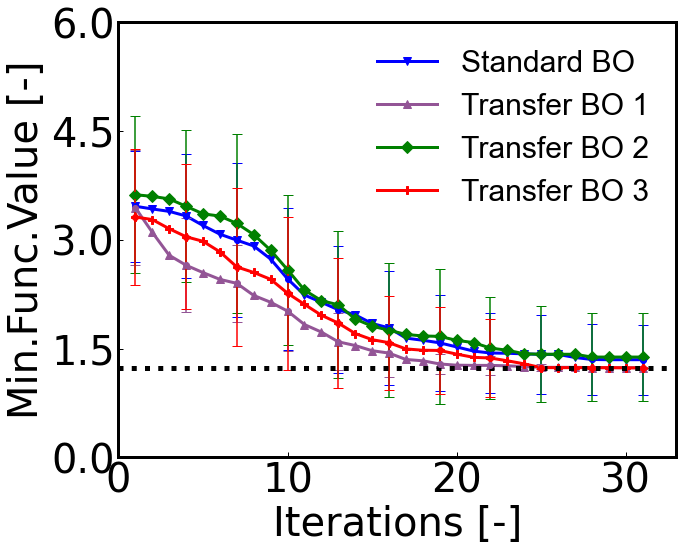

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 创建单个图形
plt.figure(figsize=(10, 8))

fontsize = 40
#  'orange'
color_sets =  [  'blue', (147/255, 85/255, 150/255) ,'green',   'red',]
color_1 = (147/255, 85/255, 150/255)
color_2 = (116/255,160/255, 161/255)
# color_sets.append( color_1 )
# color_sets.append( color_2 )

# 循环导入每个数据集
for i, label in enumerate(label_sets):
    mean_data = mean_datasets[i]
    std_data = std_datasets[i]
    
    x_values = np.arange(0, len(mean_datasets[i])) + init_sample
    
    marker_styles = [ 'v', '^', 'D', 'P', 'x']
    line_styles = ['-', '-', '-', '-', '-', '-', '-']
        
    line, = plt.plot( x_values, mean_datasets[i], label=label, marker=marker_styles[i], markersize=8,
                     linestyle=line_styles[i] ,linewidth= 3 ,color=color_sets[i])  # i  ( 4 - i )

    # 设置每隔五个点标记一次，并标记最后一个点
    markers_num = list(range(0, len(mean_datasets[i]), 3)) 
    plt.errorbar(x_values[markers_num], mean_datasets[i][markers_num], yerr=std_datasets[i][markers_num], 
                 fmt='o', capsize=5,color=line.get_color())
        

#     plt.plot(x_values, mean_data.values, label=label, 
#              marker=marker_styles[idx % len(marker_styles)], 
#              markeredgewidth=2, markerfacecolor='white',  # 这里设置了空心圆圈
#              linestyle=line_styles[idx % len(line_styles)],
#              markevery=2,color=color_sets[i])  # 每隔两个数据点进行标记
    
#     plt.fill_between(x_values, mean_data.values - std_data.values, mean_data.values + std_data.values, alpha=0.3,
#                      color=color_sets[i])

y_min = np.nanmin(mean_datasets)
plt.axhline(y_min, color='black', linestyle=':', linewidth=5)

# plt.xlim(left=0, right=30)

plt.xlim(0, iter_num + init_sample + 1 )
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.ylim(0, 6 )
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1.5))


# plt.xlabel('Number Of Samples [-]', fontsize=fontsize)
plt.xlabel('Iterations [-]', fontsize=fontsize)
plt.ylabel('Min.Func.Value [-]', fontsize=fontsize)

plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.7)

legend = plt.legend(loc='best', fontsize=30,frameon=False)
plt.setp(legend.get_texts(), fontname='Arial')

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3

# 显示图形
plt.show()


# 权重曲线

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# # # 二维函数优化

folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Goldstein'  
datasets_2 = ['0.04+0.04','fz0.02+0.02','oth1', ]

label_sets =  [ 'Source 1', 'Source 2','Source 3',] # 'RDM+EI', 'LHS+EI','SE+EI', 'SE+traEI_a', 
# label_sets =  datasets_1 + datasets_2
# label_sets =   datasets_2


eval_types = ['wt'] #  regret  Spearman  Edis  miny

def process_datasets(datasets, folder_path, eval_type, mean_datasets, std_datasets):
    for eval_type in eval_types:
        for dataset in datasets:
            # 从 Excel 文件中读取数据
            file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx')
            df = pd.read_excel(file_path, header=0, usecols=range(iter_num))
            
            df = 1 - df

        # 找到最后一列的列名,删除最大最小行
            last_column = df.columns[-1]
            max_indices = df[last_column].nlargest(drop_num).index
            min_indices = df[last_column].nsmallest(drop_num).index
            df = df.drop(max_indices)
            df.reset_index(drop=True, inplace=True)
            df = df.drop(min_indices)
            df.reset_index(drop=True, inplace=True)

            # 计算均值并存储到列表中
            mean_data = df.mean()
            mean_datasets.append(mean_data)

            # 计算标准差并存储到列表中
            std_data = df.std()
            std_datasets.append(std_data)

# 初始化列表
mean_datasets = []
std_datasets = []

# 处理 datasets
# process_datasets(datasets_1, folder_path_1, eval_types, mean_datasets, std_datasets)
process_datasets(datasets_2, folder_path_2, eval_types, mean_datasets, std_datasets)


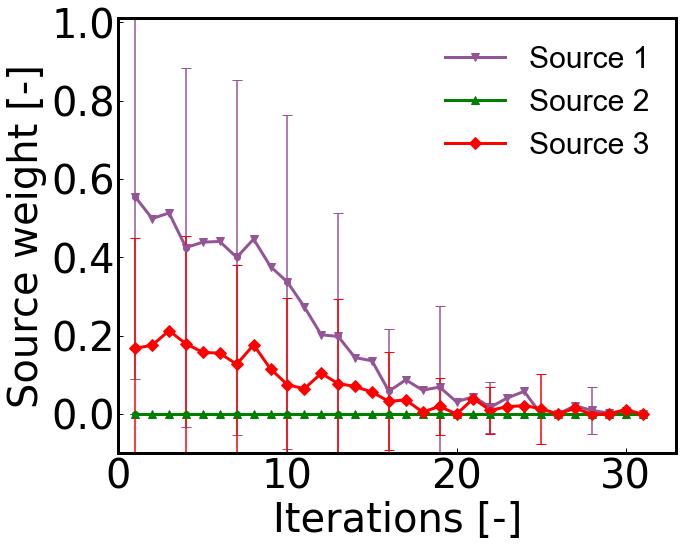

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 创建单个图形
plt.figure(figsize=(10, 8))

fontsize = 40

color_sets =  [(147/255, 85/255, 150/255) ,'green',   'red',]
# color_sets =  [  'orange','green',   'red',]
color_1 = (147/255, 85/255, 150/255)
color_2 = (116/255,160/255, 161/255)
# color_sets.append( color_1 )
# color_sets.append( color_2 )

# 循环导入每个数据集
for i, label in enumerate(label_sets):
    mean_data = mean_datasets[i]
    std_data = std_datasets[i]
    
    x_values = np.arange(0, len(mean_datasets[i])) + init_sample
    
    marker_styles = [ 'v', '^', 'D', 'P', 'x']
    line_styles = ['-', '-', '-', '-', '-', '-', '-']
        
    line, = plt.plot( x_values, mean_datasets[i], label=label, marker=marker_styles[i], markersize=8,
                     linestyle=line_styles[i] ,linewidth= 3 ,color=color_sets[i])  # i  ( 4 - i )

    # 设置每隔五个点标记一次，并标记最后一个点
    markers_num = list(range(0, len(mean_datasets[i]), 3)) 
    plt.errorbar(x_values[markers_num], mean_datasets[i][markers_num], yerr=std_datasets[i][markers_num], 
                 fmt='o', capsize=5,color=line.get_color())
        

#     plt.plot(x_values, mean_data.values, label=label, 
#              marker=marker_styles[idx % len(marker_styles)], 
#              markeredgewidth=2, markerfacecolor='white',  # 这里设置了空心圆圈
#              linestyle=line_styles[idx % len(line_styles)],
#              markevery=2,color=color_sets[i])  # 每隔两个数据点进行标记
    
#     plt.fill_between(x_values, mean_data.values - std_data.values, mean_data.values + std_data.values, alpha=0.3,
#                      color=color_sets[i])


# plt.xlim(left=0, right=30)

plt.xlim(0, iter_num + init_sample + 1 )
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))

plt.ylim(-0.1, 1.01) # (-1, 4)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2))

# plt.xlabel('Number Of Samples [-]', fontsize=fontsize)
plt.xlabel('Iterations [-]', fontsize=fontsize)
plt.ylabel('Source weight [-]', fontsize=fontsize)


plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.7)

legend = plt.legend(loc='best', fontsize=30,frameon=False)
plt.setp(legend.get_texts(), fontname='Arial')
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3

# 显示图形
plt.show()
